In [28]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 500, noise = 0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs')
rnd_clf = RandomForestClassifier(n_estimators = 100)
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(estimators=[('log_clf', log_clf), ('rnd_clf', rnd_clf), ('svm_clf', svm_clf)], voting='soft')

In [30]:
from sklearn.metrics import accuracy_score

for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, " -> ", accuracy_score(y_test, clf.predict(X_test)))

LogisticRegression  ->  0.82
RandomForestClassifier  ->  0.87
SVC  ->  0.9
VotingClassifier  ->  0.92


C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

Saving figure boosting_plot


NameError: name 'image_path' is not defined

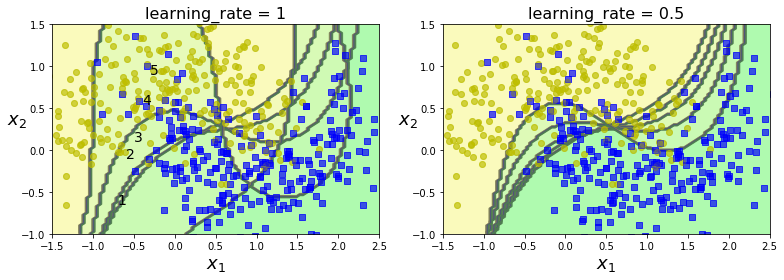

In [32]:
import matplotlib.pyplot as plt
import numpy as np

m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)

save_fig("boosting_plot")
plt.show()

In [23]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [27]:
sample_weights

array([1.     , 7.59375, 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 7.59375, 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 5.0625 , 1.     , 2.25   ,
       1.     , 2.25   , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 7.59375, 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 7.59375, 1.     , 1.5    ,
       1.     , 1.     , 1.     , 1.     , 7.59375, 1.     , 7.59375,
       1.     , 1.     , 1.     , 1.     , 7.59375, 1.     , 1.     ,
       1.     , 1.     , 2.25   , 1.     , 2.25   , 1.     , 7.59375,
       1.     , 1.     , 1.5    , 1.     , 1.     , 2.25   , 1.     ,
       1.     , 1.     , 1.     , 7.59375, 1.     , 1.     , 1.     ,
       3.375  , 1.  

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X = np.random.rand(1000, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(1000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

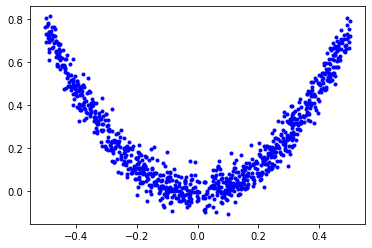

In [51]:
plt.plot(X, y, "b.")

In [54]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]


In [58]:
for _yyy in gbrt.staged_predict(X_test):
    print(_yyy)

[0.30263476 0.24474909 0.27905474 0.24474909 0.24474909 0.24474909
 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909
 0.24474909 0.24474909 0.24474909 0.28422354 0.24474909 0.24474909
 0.30263476 0.30263476 0.24474909 0.24474909 0.24474909 0.28422354
 0.24474909 0.24474909 0.24474909 0.27905474 0.24474909 0.24474909
 0.28422354 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909
 0.27905474 0.24474909 0.24474909 0.24474909 0.28422354 0.24474909
 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909 0.28422354
 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909
 0.28422354 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909
 0.28422354 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909
 0.24474909 0.24474909 0.24474909 0.24474909 0.24474909 0.27905474
 0.24474909 0.28422354 0.24474909 0.24474909 0.27905474 0.27905474
 0.24474909 0.28422354 0.24474909 0.24474909 0.30263476 0.24474909
 0.24474909 0.24474909 0.28422354 0.24474909 0.24474909 0.2790

In [6]:
# --- MNIST classifier
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.int64)


In [7]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(mnist.data, mnist.target, test_size=10000)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000)


In [8]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

random_forest_clf = RandomForestClassifier(n_estimators=10)
extra_tree_clf = ExtraTreesClassifier(n_estimators=10)
svm_clf = LinearSVC()
mlp_clf = MLPClassifier()

for estimator in [random_forest_clf, extra_tree_clf, svm_clf, mlp_clf]:
    print("Training the ", estimator)
    estimator.fit(X_train, y_train)

Training the  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training the  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
Train

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training the  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [9]:
[estimator.score(X_val, y_val) for estimator in [random_forest_clf, extra_tree_clf, svm_clf, mlp_clf]]

[0.9481, 0.9511, 0.8573, 0.9635]

In [103]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_tree_clf", extra_tree_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf)
]

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)
voting_clf.score(X_val, y_val)

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9633

In [105]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9424, 0.9483, 0.8857, 0.9632]

In [106]:
voting_clf.set_params(svm_clf = None)

# --- SVC removed from training estimators
voting_clf.estimators[2]

('svm_clf', None)

In [107]:
# --- SVC DIDN'T removed from result
voting_clf.estimators_[2]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [108]:
del voting_clf.estimators_[2]

In [109]:
# --- "hard" voting
voting_clf.score(X_val, y_val)

0.9634

In [110]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9424, 0.9483, 0.9632]

In [111]:
# --- check validation set on "soft" voting
voting_clf.voting = "soft"
voting_clf.score(X_val, y_val)

0.9688

In [112]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9424, 0.9483, 0.9632]

In [113]:
# --- check test set on soft voting
voting_clf.score(X_test, y_test)

0.9704

In [114]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9438, 0.9491, 0.9655]

In [10]:
estimators = [random_forest_clf, extra_tree_clf, svm_clf, mlp_clf]
enumerate(estimators)

In [11]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [12]:
X_val_predictions

array([[4., 4., 4., 4.],
       [7., 7., 7., 7.],
       [1., 1., 1., 1.],
       ...,
       [6., 6., 6., 6.],
       [3., 3., 3., 3.],
       [6., 2., 6., 6.]], dtype=float32)

In [13]:
y_val

array([4, 7, 1, ..., 6, 3, 6], dtype=int64)

In [14]:
rand_forest_clf = RandomForestClassifier(n_estimators=200, oob_score=True)
rand_forest_clf.fit(X_val_predictions, y_val)
rand_forest_clf.oob_score_

0.9662

In [15]:
from sklearn.metrics import accuracy_score

X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)
    
y_test_predictions = rand_forest_clf.predict(X_test_predictions)

accuracy_score(y_test_predictions, y_test)

0.9624

In [16]:
rand_forest_clf.score(X_test_predictions, y_test)

0.9624